<a href="https://colab.research.google.com/github/helookscool/CSAI_assignment/blob/main/n211a_simple_regression_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.

In [ ]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
#결측치 확인하는 기본센스.
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 1) 

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
target = ['price']
feature1 = ['bedrooms']
feature2 = ['bathrooms']
feature3 = ['sqft_living']
feature4 = ['sqft_lot']
feature5 = ['floors']
feature6 = ['condition']
feature7 = ['grade']
feature8 = ['sqft_above']
feature9 = ['yr_built']
feature10 = ['yr_renovated	']
feature11 = ['zipcode']
feature12 = ['lat	']
feature13 = ['long']
feature14 = ['sqft_living15']
feature15 = ['sqft_lot15']

In [ ]:
X_train = df[feature1]
y_train = df[target]
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.coef_

array([[121716.12651184]])

In [ ]:
#위의 방식으로 feature 1부터15까지 쭉 해보면 상관계수를 구할수 있으나, 귀찮으므로 다른 방식을 써보자. 

In [ ]:
#df.corr로 상관계수뽑아서 price에서 내림차순 정리하면 price와 가장 높은 상관관계를 가진 특성은 sqft_living 이다.
df1=df.corr().sort_values('price',ascending=False)
df1['price']

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

### 2) 

In [ ]:
predict = df['price'].mean() #기준모델을 '평균'으로 정하자.
errors = predict - df['price']# 평균값으로 예측할 때 샘플 별 평균값과의 차이(error)를 저장
mean_absolute_error = errors.abs().mean() #평균절대오차를 구해보자

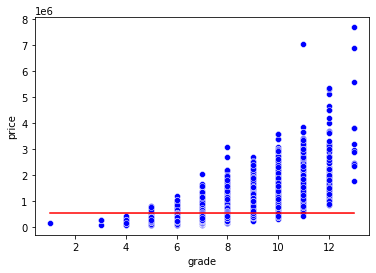

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
x = df['grade']
y = df['price']

predict = df['price'].mean()
errors = predict - df['price']
mean_absolute_error = errors.abs().mean()

sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='blue');

### 3) 

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X_train = df[feature7]
y_train = df[target]
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
## 새로운 데이터 한 샘플을 선택해 학습한 모델을 통해 예측해 봅니다
X_test = [[6]]
y_pred = model.predict(X_test)

print(f'{X_test[0][0]} grade 를 가지는 주택의 예상 가격은 ${int(y_pred)} 입니다.')

6 grade 를 가지는 주택의 예상 가격은 $194700 입니다.


### 4) 

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###
model.coef_
#1grade당 208457.56 딸라 정도 변동이 있다. 

array([[208457.56245838]])

### 5) 

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X_train = df[feature3]
y_train = df[target]
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.coef_

array([[280.6235679]])

## 🔥도전과제

### 6) 

1. 선형회귀는 잔차의 제곱합(SSE: Error sum of squares)를 최소화하는 방법으로 회귀계수를 추정한다. 즉 SSE가 작으면 작을수록 좋은 모델이라고 볼 수 있다. 
-잔차는 모델이 특성x를 통해 y를 설명하지 못하는 부분이다.
-MSE(Mean Squared Error)는 SSE를 표준화한 개념이다.)

2. 회귀분석은 결국 Y의 변동성을 독립변수들이 얼마나 잘 설명하느냐가 중요하므로, y를 설명하는 x의 변동성(분산)이 크면 좋은 변수이다.(p값이 자연스럽게 낮아짐)

요컨대 회귀분석을 만들기 위해 좋은 특성이란, 잔차의 제곱합은 작고, 종속변수y를 설명하는 x의 분산값이 큰 것이다. 

### 7) 

Ordinary Least Squares.
선형성에 대한 가정이 만족되었을 때, 잔차의 제곱값의 합들을 최소가 되게 하는 직선이 자료의 선형적인 관계를 가장 잘 표현하는(설명력 높은, 가장 적합한)직선이라는 가정하에 가장 적합한 회귀계수 추정치를 찾음으로서 가장 적합한 회귀직선을 추정하는 방법을 말한다. 이렇게 얻어지는 추정치를 보통 최소 제곱(OLS)추정치라고 한다. 

선형성: 실제 추정하고자 하는 현실이 선형적인 모델로 설명될 수 있어야 할 것. 즉 독립변수들에 대해 편미분을 하면 상수가 나와야 함.
이 조건을 만족하지 못하면 최소자승법으로 추정한 모델은 기본적으로 잘못된, 의미 없는 추정이 된다.

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###